# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scipy.stats

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Read Data

In [2]:
df = pd.read_csv("../data/toy_data.csv", index_col=0)

In [3]:
df.head()

,x,y,type
0,-0.804458,0.320932,yes
1,-0.025483,0.644324,yes
2,-0.300797,0.389475,yes
3,-0.107437,-0.479983,yes
4,0.595036,-0.464668,yes


In [4]:
x_label = df.columns[0]
y_label = df.columns[1]

sample_size = df.shape[0]

# Generate Training and Testing Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[x_label], df[y_label],
                                                    test_size=0.25,
                                                    random_state=42)

# Train Linear Regression Model

In [6]:
lin_reg_model = scipy.stats.linregress(X_train, y_train)

slope = lin_reg_model.slope
intercept = lin_reg_model.intercept
r_value = lin_reg_model.rvalue

# Make Predictions and Checking Error 

In [7]:
predictions = slope * X_test + intercept
residuals = y_test - predictions

In [13]:
results_df = pd.DataFrame({'x':X_test, 
                           'y_actual':y_test, 
                           'y_predicted':predictions,
                           'residual':residuals})
results_df.head()

,x,y_actual,y_predicted,residual
361,4.465897,-1.342260,-2.550018,1.207759
73,-1.259818,-0.665986,0.211950,-0.877936
374,2.495033,-2.754207,-1.599314,-1.154894
155,0.462606,0.235474,-0.618912,0.854386
104,1.373428,-2.749678,-1.058274,-1.691403


# Root Mean Squared Error

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Visualizing the Linear Model

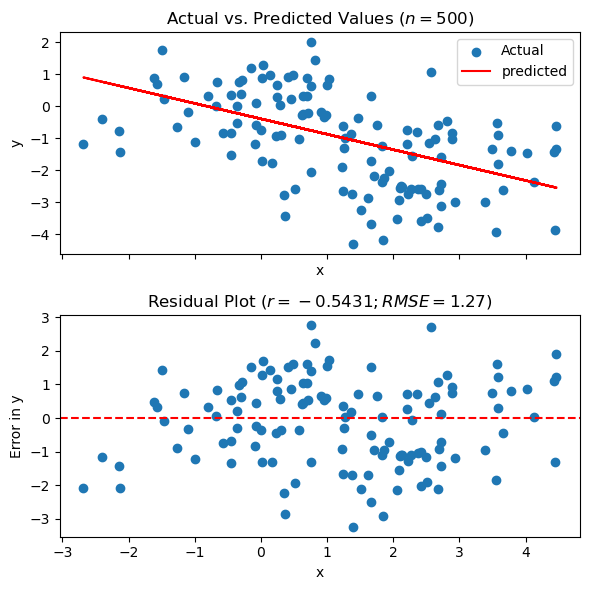

In [8]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6,6))

ax[0].scatter(X_test, y_test, label='Actual')
ax[0].set_xlabel(x_label)
ax[0].set_ylabel(y_label)
ax[0].set_title(f'Actual vs. Predicted Values ($n={sample_size})$')
ax[0].plot(X_test, predictions, color='r', label='predicted')
ax[0].legend()

ax[1].scatter(X_test, residuals, label='Actual')
ax[1].axhline(0, color='r', linestyle='--')
ax[1].set_xlabel(x_label)
ax[1].set_ylabel(f'Error in {y_label}')
ax[1].set_title(f'Residual Plot ($r={r_value:.4f}; RMSE={rmse:.2f})$')

plt.tight_layout()

# Using statsmodels

In [9]:
from statsmodels.formula.api import ols